In [14]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [15]:
class TwoCompartmentModel:
    """
    Two compartment model, with additional GI compartment and elimination from C1.

    T------T          T------T          T------T
    |      |          |      |          |      |
    |  GI  | --k_a--> | C1   | --k12--> |  C2  |
    |      |          |      | <-k21--- |      |
    L------L          L------L          L------L
                        |
                        | k_e
                        |
                        V
                    (Eliminated)
    
    """
    def __init__(self,
                 ka: float,
                 k12: float,
                 k21: float,
                 ke: float):
        self.ka = ka
        self.k12 = k12
        self.k21 = k21
        self.ke = ke

        self.C1 = 0
        self.C2 = 0
        self.GI = 0

    def set_initial_conditions(self, C1: float, C2: float, GI: float):
        self.C1 = C1
        self.C2 = C2
        self.GI = GI

    def get_initial_conditions(self):
        return self.C1, self.C2, self.GI
    
    def get_clearance(self):
        return self.ke
    
    def get_rate_constants(self):
        return self.ka, self.k12, self.k21
    
    def get_concentrations(self):
        return self.C1, self.C2, self.GI
    
    def right_hand_side(self, t, y):
        C1, C2, GI = y

        dC1dt = self.ka * GI - (self.k12 + self.ke) * C1
        dC2dt = self.k12 * C1 - self.k21 * C2
        dGIdt = -self.ka * GI

        return [dC1dt, dC2dt, dGIdt]

    def simulate(self, t):

        y0 = [self.C1, self.C2, self.GI]
        sol = solve_ivp(self.right_hand_side, [t[0], t[-1]], y0, method='RK45')

        return sol.t, sol.y

        

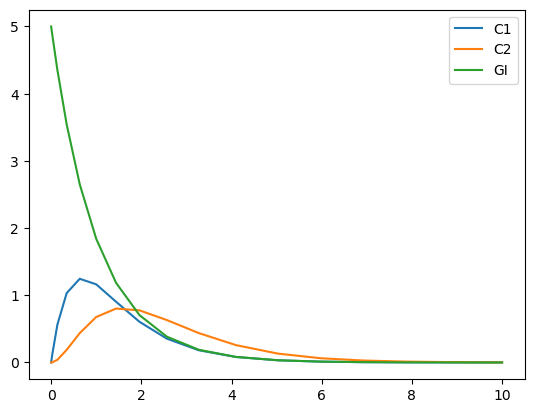

In [16]:

twoC = TwoCompartmentModel(ka=1, k12=1, k21=1, ke=1)
twoC.set_initial_conditions(C1=0, C2=0, GI=5)

t, y = twoC.simulate([0, 10])


plt.plot(t, y[0], label='C1')
plt.plot(t, y[1], label='C2')
plt.plot(t, y[2], label='GI')

plt.legend()